In [4]:
import numpy as np
import pandas as pd


In [71]:
df = pd.read_csv('ml_ozon_сounterfeit_test.csv')
df.head()


,id,brand_name,description,name_rus,CommercialTypeName4,rating_1_count,rating_2_count,rating_3_count,rating_4_count,rating_5_count,...,ExemplarReturnedCountTotal30,ExemplarReturnedCountTotal90,ExemplarReturnedValueTotal7,ExemplarReturnedValueTotal30,ExemplarReturnedValueTotal90,ItemVarietyCount,ItemAvailableCount,seller_time_alive,ItemID,SellerID
0,17384,NaN,Приветствую! Мы собираем классные системные бл...,"LeBefane Системный блок (AMD Ryzen 5 7500F, RA...",Настольный компьютер,NaN,NaN,NaN,NaN,NaN,...,1.0,3.0,0.000000,658.085303,768.020850,1.0,1.0,1010.0,8777,398
1,260316,Canon,<li>Тип товара Новый</li><li><b>Тип</b> Картри...,Картридж лазерный Canon 071H 5646C002 черный (...,"Картридж, чернила, тонер",NaN,NaN,NaN,NaN,NaN,...,102.0,277.0,1046.284281,1259.789504,1386.227650,425.0,425.0,997.0,127929,576
2,10610,Devia,Электронное перо Touch S-Pen для Samsung Galax...,Стилус для Samsung Galaxy Z Fold5 5G/ SM-F946B...,Стилус,NaN,NaN,NaN,NaN,NaN,...,93.0,244.0,934.117581,1111.416588,1201.633994,9.0,9.0,812.0,5341,1946
3,205236,GALAXY LINE,Мультиварка GALAXY GL2643 имеет все необходимы...,"Мультиварка GALAXY GL2643 ( 900 Вт, 10 програм...","Мультиварка, скороварка",NaN,NaN,NaN,NaN,NaN,...,23.0,61.0,1067.935416,1267.434380,1322.794836,8.0,8.0,785.0,100481,697
4,308655,MAUNFELD,Чайники с ретро-термометром позволяет нагреть ...,Чайник электрический MAUNFELD MGK-625MINT. Тов...,Чайник электрический,NaN,NaN,NaN,NaN,NaN,...,557.0,1476.0,1405.752984,1553.905780,1643.785320,57.0,57.0,1767.0,151937,1575


In [10]:
df.CommercialTypeName4.value_counts()

CommercialTypeName4
Дисплеи для телефонов                  15002
Аккумулятор для мобильного телефона    11965
Корпуса для телефонов                  11960
Запчасти для телевизора                10192
Картридж, чернила, тонер                8570
                                       ...  
Этнический музыкальный инструмент          1
Попкорница                                 1
Ножеточка электрическая                    1
Встраиваемый морозильник                   1
Посудомоечная машина компактная            1
Name: count, Length: 634, dtype: int64

# Товары без изображений

In [6]:
import os
test_df = pd.read_csv("ml_ozon_сounterfeit_test.csv")
# images_path = "images/train/"
def has_image(item_id):
    file_path = os.path.join('images/test/', f"{item_id}.png")
    return os.path.exists(file_path)

test_df["has_image"] = test_df["ItemID"].apply(has_image)

# Сколько товаров без карточки
missing_count = (~test_df["has_image"]).sum()

# Сколько из них с resolution = 1
# missing_resolution1_count = test_df[(~test_df["has_image"]) & (test_df["resolution"] == 1)].shape[0]

print(f"Товаров без карточки: {missing_count}")
# print(f"Из них с resolution = 1: {missing_resolution1_count}")

Товаров без карточки: 25


In [4]:
test_df.head()


,id,brand_name,description,name_rus,CommercialTypeName4,rating_1_count,rating_2_count,rating_3_count,rating_4_count,rating_5_count,...,ExemplarReturnedCountTotal90,ExemplarReturnedValueTotal7,ExemplarReturnedValueTotal30,ExemplarReturnedValueTotal90,ItemVarietyCount,ItemAvailableCount,seller_time_alive,ItemID,SellerID,has_image
0,17384,NaN,Приветствую! Мы собираем классные системные бл...,"LeBefane Системный блок (AMD Ryzen 5 7500F, RA...",Настольный компьютер,NaN,NaN,NaN,NaN,NaN,...,3.0,0.000000,658.085303,768.020850,1.0,1.0,1010.0,8777,398,True
1,260316,Canon,<li>Тип товара Новый</li><li><b>Тип</b> Картри...,Картридж лазерный Canon 071H 5646C002 черный (...,"Картридж, чернила, тонер",NaN,NaN,NaN,NaN,NaN,...,277.0,1046.284281,1259.789504,1386.227650,425.0,425.0,997.0,127929,576,True
2,10610,Devia,Электронное перо Touch S-Pen для Samsung Galax...,Стилус для Samsung Galaxy Z Fold5 5G/ SM-F946B...,Стилус,NaN,NaN,NaN,NaN,NaN,...,244.0,934.117581,1111.416588,1201.633994,9.0,9.0,812.0,5341,1946,True
3,205236,GALAXY LINE,Мультиварка GALAXY GL2643 имеет все необходимы...,"Мультиварка GALAXY GL2643 ( 900 Вт, 10 програм...","Мультиварка, скороварка",NaN,NaN,NaN,NaN,NaN,...,61.0,1067.935416,1267.434380,1322.794836,8.0,8.0,785.0,100481,697,True
4,308655,MAUNFELD,Чайники с ретро-термометром позволяет нагреть ...,Чайник электрический MAUNFELD MGK-625MINT. Тов...,Чайник электрический,NaN,NaN,NaN,NaN,NaN,...,1476.0,1405.752984,1553.905780,1643.785320,57.0,57.0,1767.0,151937,1575,True


In [27]:
test_df[test_df["has_image"] == False]


,id,brand_name,description,name_rus,CommercialTypeName4,rating_1_count,rating_2_count,rating_3_count,rating_4_count,rating_5_count,...,ExemplarReturnedCountTotal90,ExemplarReturnedValueTotal7,ExemplarReturnedValueTotal30,ExemplarReturnedValueTotal90,ItemVarietyCount,ItemAvailableCount,seller_time_alive,ItemID,SellerID,has_image
1720,377390,NaN,NaN,XIAJIA,Пароварка электрическая,NaN,NaN,NaN,NaN,NaN,...,14.0,868.777672,1022.208851,1103.694868,1.0,1.0,519.0,185232,11822,False
3032,339413,NaN,Шлейф для Samsung Galaxy A15 4G/5G (A155F/A156...,Шлейф для Samsung Galaxy A15 4G/5G (A155F/A156...,Дисплеи для телефонов,NaN,NaN,NaN,NaN,NaN,...,4.0,738.783299,783.982620,847.836656,6.0,6.0,719.0,167026,558,False
3694,126420,CONTENT,"артикул - vt-8833, Тонер Content для Samsung...","2 штуки, Тонер Content для Samsung ML-1210/Xer...","Картридж, чернила, тонер",NaN,NaN,NaN,NaN,NaN,...,11.0,668.595662,712.453936,879.348314,44.0,44.0,1110.0,62051,682,False
4156,55935,NaN,Задняя крышка для Samsung Galaxy A05s (A057F) ...,Задняя крышка для Samsung Galaxy A05s (A057F) ...,Корпуса для телефонов,NaN,NaN,NaN,NaN,NaN,...,7.0,580.649408,580.646241,887.984959,4.0,4.0,1224.0,27985,1203,False
4350,446215,Xiaomi,NaN,Робот-пылесос Xiaomi Robot Vacuum E12,Робот-пылесос,NaN,NaN,NaN,NaN,NaN,...,25.0,999.979389,1177.561635,1326.887920,25.0,24.0,503.0,216973,1897,False
4475,380156,NaN,Аккумулятор для Samsung Galaxy A05s (A057F) (S...,Аккумулятор для Samsung Galaxy A05s (A057F) (S...,Аккумулятор для мобильного телефона,NaN,NaN,NaN,NaN,NaN,...,4.0,738.770535,783.997115,847.827200,6.0,6.0,719.0,186431,558,False
5547,116736,Xiaomi,NaN,Робот-пылесос Xiaomi Robot Vacuum E5 white,Робот-пылесос,NaN,NaN,NaN,NaN,NaN,...,25.0,1000.012466,1177.550889,1326.916383,25.0,24.0,503.0,57460,1897,False
6806,402290,OEM,NaN,Чип к картриджу Samsung ML-1640/1641/2240/2241...,"Картридж, чернила, тонер",NaN,NaN,NaN,NaN,NaN,...,2.0,653.369500,653.388698,653.367973,3.0,3.0,64.0,196506,11859,False
7276,370551,NaN,Рамка дисплея для Samsung Galaxy A05 (A055F) Ч...,Рамка дисплея для Samsung Galaxy A05 (A055F) Ч...,Корпуса для телефонов,NaN,NaN,NaN,NaN,NaN,...,7.0,580.640658,580.645940,887.980906,4.0,4.0,1224.0,181940,1203,False
7363,179247,NaN,Оригинал с разбора битого. Проверено. Гарантия,Основная камера Samsung Galaxy S6,Корпуса для телефонов,NaN,NaN,NaN,NaN,NaN,...,43.0,930.283850,1044.731011,1117.164588,85.0,85.0,317.0,87768,653,False


In [29]:
test_df["has_image"].value_counts()

has_image
True     22735
False       25
Name: count, dtype: int64

In [28]:
# df[df["has_image"] == 0]
out_path = Path("features_out/no_image_products_test.csv")
out_path.parent.mkdir(parents=True, exist_ok=True)

mask = pd.to_numeric(test_df["has_image"], errors="coerce").fillna(0).astype(int) == 0
out = test_df[mask]

out.to_csv(out_path, index=False)
print(f"Готово: {len(out)} строк записано в {out_path}")


Готово: 25 строк записано в features_out\no_image_products_test.csv


In [21]:
out

,id,resolution,brand_name,description,name_rus,CommercialTypeName4,rating_1_count,rating_2_count,rating_3_count,rating_4_count,...,ExemplarReturnedCountTotal90,ExemplarReturnedValueTotal7,ExemplarReturnedValueTotal30,ExemplarReturnedValueTotal90,ItemVarietyCount,ItemAvailableCount,seller_time_alive,ItemID,SellerID,has_image
329,45730,0,NaN,Задняя крышка телефона - это неотъемлемая част...,"Задняя крышка Samsung Galaxy J4 Plus 2018, SM ...",Корпуса для телефонов,0.0,0.0,0.0,0.0,...,107.0,841.324498,984.738061,1118.659205,7.0,7.0,484.0,22826,188,False
560,387498,0,NaN,Задняя крышка телефона - это неотъемлемая част...,Задняя крышка для Galaxy S21 (G991B) Фиолетовый,Корпуса для телефонов,NaN,NaN,NaN,NaN,...,107.0,841.317230,984.731219,1118.672660,7.0,7.0,484.0,189887,188,False
564,228882,0,NaN,Задняя крышка телефона - это неотъемлемая част...,Задняя крышка для Samsung Galaxy A3 2017 (A320...,Корпуса для телефонов,NaN,NaN,NaN,NaN,...,107.0,841.303572,984.724386,1118.684449,7.0,7.0,484.0,112350,188,False
565,164985,0,NaN,Задняя крышка телефона - это неотъемлемая част...,Задняя крышка для Samsung Galaxy A10 (A105F) К...,Корпуса для телефонов,NaN,NaN,NaN,NaN,...,107.0,841.292407,984.725880,1118.662208,7.0,7.0,484.0,81090,188,False
1067,338211,0,NaN,Задняя крышка телефона - это неотъемлемая част...,Задняя крышка для Samsung Galaxy A50 (A505F) Ч...,Корпуса для телефонов,NaN,NaN,NaN,NaN,...,103.0,758.788488,964.163241,1113.957268,5.0,5.0,485.0,166443,188,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178423,372980,0,NaN,"Почему мы — Ваш выбор №1?\n\n1 Продуктивность,...",Рамка дисплея для Xiaomi Redmi 9 Черная,Дисплеи для телефонов,NaN,NaN,NaN,NaN,...,246.0,944.185144,1062.636350,1166.576004,35.0,35.0,354.0,183152,453,False
178439,196886,0,NaN,"Почему мы — Ваш выбор №1?\n\n1 Продуктивность,...",Рамка дисплея для Xiaomi Redmi Note 7/7 Pro Че...,Дисплеи для телефонов,NaN,NaN,NaN,NaN,...,246.0,944.174295,1062.636094,1166.586745,35.0,35.0,354.0,96367,453,False
179309,70790,0,NaN,"Почему мы — Ваш выбор №1?\n\n1 Продуктивность,...",Шлейф для Samsung Galaxy T311 плата системный ...,Шлейфы для телефонов,NaN,NaN,NaN,NaN,...,245.0,946.133793,1062.104047,1166.018812,2.0,2.0,355.0,35338,453,False
184572,275068,1,NaN,"Важно! При первом использование, вам необходим...",Наушники беспроводные c шумоподавлением Apple ...,Моногарнитура Bluetooth,NaN,NaN,NaN,NaN,...,6.0,0.000000,765.292925,871.949984,NaN,NaN,197.0,135248,8617,False


# Дубликаты изображений

In [5]:
from pathlib import Path
import hashlib, csv
from collections import defaultdict

In [62]:
IMG_DIR = Path("images/train")  # <-- ваш каталог
OUT_CSV = Path("features_out/duplicate_groups_exact.csv")
OUT_CSV.parent.mkdir(exist_ok=True, parents=True)

def file_hash(path, algo="sha256", chunk=1024*1024):
    h = hashlib.new(algo)
    with open(path, "rb") as f:
        while True:
            b = f.read(chunk)
            if not b: break
            h.update(b)
    return h.hexdigest()

IMG_EXTS = {".jpg",".jpeg",".png",".webp",".bmp",".jfif",".tif",".tiff",".JPG",".PNG",".JPEG",".WEBP",".BMP",".TIFF"}

hash2paths = defaultdict(list)
for p in IMG_DIR.rglob("*"):
    if p.is_file() and p.suffix in IMG_EXTS:
        try:
            h = file_hash(p)
            hash2paths[h].append(str(p))
        except Exception:
            pass

dup_groups = [paths for paths in hash2paths.values() if len(paths) > 1]
dup_count = sum(len(g) for g in dup_groups)

print(f"Найдено групп точных дубликатов: {len(dup_groups)}")
print(f"Всего файлов-дубликатов (в группах): {dup_count}")

# Печать первых 5 групп
for i, g in enumerate(dup_groups[:5], 1):
    print(f"\nГруппа #{i} (size={len(g)}):")
    for path in g:
        print(" -", Path(path).name)

# Сохраним все группы в CSV
with OUT_CSV.open("w", newline="", encoding="utf-8") as f:
    w = csv.writer(f)
    w.writerow(["group_id","size","path"])
    for gid, g in enumerate(dup_groups, 1):
        for path in g:
            w.writerow([gid, len(g), path])
print("Сохранено в:", OUT_CSV)

Найдено групп точных дубликатов: 18722
Всего файлов-дубликатов (в группах): 75250

Группа #1 (size=18):
 - 0.png
 - 100599.png
 - 10802.png
 - 11429.png
 - 12056.png
 - 26607.png
 - 27632.png
 - 34994.png
 - 44889.png
 - 48054.png
 - 54299.png
 - 65797.png
 - 72556.png
 - 74612.png
 - 81048.png
 - 8142.png
 - 84621.png
 - 84622.png

Группа #2 (size=13):
 - 1.png
 - 16443.png
 - 18548.png
 - 20091.png
 - 26617.png
 - 35764.png
 - 50544.png
 - 5320.png
 - 57639.png
 - 66408.png
 - 73192.png
 - 74613.png
 - 94866.png

Группа #3 (size=19):
 - 100000.png
 - 108125.png
 - 114804.png
 - 119629.png
 - 119647.png
 - 127944.png
 - 17002.png
 - 28997.png
 - 29484.png
 - 30745.png
 - 3463.png
 - 53071.png
 - 55244.png
 - 55358.png
 - 57606.png
 - 58959.png
 - 74408.png
 - 85846.png
 - 91203.png

Группа #4 (size=23):
 - 100001.png
 - 116433.png
 - 120646.png
 - 129900.png
 - 131209.png
 - 135347.png
 - 146640.png
 - 165724.png
 - 17001.png
 - 17193.png
 - 19786.png
 - 203499.png
 - 2342.png
 - 2364

# CLIP - эмбеддинги

In [1]:
import torch
print(torch.__version__)

2.8.0+cu129


In [5]:
import torch
print("CUDA доступна:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("Устройство:", torch.cuda.get_device_name(0))
    x = torch.randn(1000, 1000, device="cuda")
    y = x @ x.T
    print("OK, вычисления на GPU:", y.is_cuda)


CUDA доступна: True
Устройство: NVIDIA GeForce RTX 3060 Ti
OK, вычисления на GPU: True


In [6]:
import argparse, json, os
from pathlib import Path
from typing import List, Tuple, Optional

import numpy as np
from PIL import Image, ImageOps
from tqdm import tqdm

import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from torchvision.models import resnet50, ResNet50_Weights

In [ ]:
def _lazy_easyocr_reader(langs=('ru','en'), gpu=True):
    try:
        import easyocr
        return easyocr.Reader(list(langs), gpu=gpu)
    except Exception as e:
        raise RuntimeError(
            f"Не удалось инициализировать easyocr: {e}. "
            f"Поставьте `pip install easyocr` или отключите --mask-text."
        )

def mask_text_regions(pil_img: Image.Image, reader=None, blur=True) -> Image.Image:
    """
    Находит текстовые области и размывает (или заливает).
    Работает детерминированно; используйте для eval/индекса или по флагу.
    """
    import cv2
    img = np.array(pil_img.convert("RGB"))[:, :, ::-1]  # RGB->BGR
    H, W = img.shape[:2]
    if reader is None:
        reader = _lazy_easyocr_reader()
    res = reader.readtext(img)

    mask = np.zeros((H, W), dtype=np.uint8)
    for r in res:
        box = r[0]  # [(x1,y1),(x2,y2),(x3,y3),(x4,y4)]
        pts = np.array(box, dtype=np.int32)
        cv2.fillPoly(mask, [pts], 255)

    if not mask.any():  # нет текста
        return pil_img

    if blur:
        blurred = cv2.GaussianBlur(img, (21, 21), 0)
        img[mask == 255] = blurred[mask == 255]
    else:
        img[mask == 255] = (128, 128, 128)

    return Image.fromarray(img[:, :, ::-1])  # BGR->RGB
IMAGENET_MEAN_STD = ((0.485, 0.456, 0.406),(0.229, 0.224, 0.225))
CLIP_MEAN_STD     = ((0.48145466, 0.4578275, 0.40821073),
                     (0.26862954, 0.26130258, 0.27577711))

def build_transforms(model_type: str, mode: str, fivecrop: bool, mask_text: bool, ocr_gpu: bool):
    # базовая «починка» EXIF и RGB
    base = [transforms.Lambda(lambda im: ImageOps.exif_transpose(im).convert("RGB"))]

    if mask_text:
        # OCR маска — отдельным шагом в PIL
        base.append(transforms.Lambda(lambda im: mask_text_regions(im, reader=_lazy_easyocr_reader(gpu=ocr_gpu), blur=True)))

    # выбор mean/std
    mean, std = CLIP_MEAN_STD if model_type == "clip" else IMAGENET_MEAN_STD

    if mode == "train":
        aug = [
            transforms.RandomResizedCrop(224, scale=(0.9, 1.0), ratio=(0.95, 1.05), antialias=True),
            transforms.RandomHorizontalFlip(p=0.05),
            transforms.ColorJitter(brightness=0.15, contrast=0.15),
        ]
        post = [
            transforms.ToTensor(),
            transforms.Normalize(mean=mean, std=std),
        ]
        return transforms.Compose(base + aug + post), False  # fivecrop не применяем в train
    else:
        # eval / индекс
        if fivecrop:
            # Возвращаем кортеж из 5 PIL-кропов, дальше превращаем в батч тензоров
            pre = [
                transforms.Resize(256, antialias=True),
                transforms.FiveCrop(224),  # -> tuple of 5 PIL
            ]
            return transforms.Compose(base + pre), True
        else:
            pre = [
                transforms.Resize(256 if model_type!="clip" else 224, antialias=True),
                transforms.CenterCrop(224),
                transforms.ToTensor(),
                transforms.Normalize(mean=mean, std=std),
            ]
            return transforms.Compose(base + pre), False

# ---------- Датасет ----------
IMG_EXTS = {".jpg", ".jpeg", ".png", ".webp", ".bmp"}

class ImgFolder(Dataset):
    def __init__(self, root: Path, transform, model_type: str, fivecrop: bool):
        self.paths = [p for p in root.rglob("*") if p.suffix.lower() in IMG_EXTS]
        self.transform = transform
        self.model_type = model_type
        self.fivecrop = fivecrop

        # пост-нормализация для FiveCrop (делаем тензоры и нормализацию)
        mean, std = CLIP_MEAN_STD if model_type == "clip" else IMAGENET_MEAN_STD
        self._post = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize(mean=mean, std=std),
        ])

    def __len__(self): return len(self.paths)

    def __getitem__(self, i):
        p = self.paths[i]
        im = Image.open(p)
        out = self.transform(im)

        if self.fivecrop:
            # out — tuple из 5 PIL; конвертим в батч [5,3,224,224]
            crops = [self._post(c) for c in out]
            x = torch.stack(crops, dim=0)
            return x, str(p)
        else:
            return out, str(p)

# ---------- Модели ----------
def load_resnet50_backbone(device):
    model = resnet50(weights=ResNet50_Weights.IMAGENET1K_V2).to(device).eval()
    backbone = nn.Sequential(*list(model.children())[:-1]).to(device)  # до avgpool
    for p in backbone.parameters():
        p.requires_grad = False
    return backbone  # [B, 2048, 1, 1] -> squeeze -> [B, 2048]

def load_clip(device):
    import clip
    model, _ = clip.load("ViT-B/16", device=device)  # можно заменить на ViT-B/16
    model.eval()
    return model

# ---------- Извлечение признаков ----------
@torch.inference_mode()
def extract_resnet(dataloader: DataLoader, device: torch.device, fivecrop: bool) -> Tuple[torch.Tensor, List[str]]:
    backbone = load_resnet50_backbone(device)
    feats, ids = [], []

    for batch in tqdm(dataloader, desc="ResNet50"):
        x, names = batch
        if fivecrop:
            # x: [B, 5, 3, 224, 224] -> обрабатываем как B*5
            B, CROP, C, H, W = x.shape
            x = x.view(B*CROP, C, H, W).to(device, non_blocking=True)
        else:
            x = x.to(device, non_blocking=True)

        with torch.autocast(device_type=device.type, dtype=torch.float16, enabled=device.type=="cuda"):
            f = backbone(x).squeeze(-1).squeeze(-1).float()  # [*, 2048]
            f = torch.nn.functional.normalize(f, dim=1)

        if fivecrop:
            f = f.view(-1, 5, f.shape[-1]).mean(dim=1)  # усредняем по 5 кропам

        feats.append(f.cpu())
        ids.extend(names)

    return torch.cat(feats, dim=0), ids

@torch.inference_mode()
def extract_clip_images(dataloader: DataLoader, device: torch.device, fivecrop: bool) -> Tuple[torch.Tensor, List[str]]:
    model = load_clip(device)
    feats, ids = [], []

    for batch in tqdm(dataloader, desc="CLIP-image"):
        x, names = batch
        if fivecrop:
            B, CROP, C, H, W = x.shape
            x = x.view(B*CROP, C, H, W).to(device, non_blocking=True)
        else:
            x = x.to(device, non_blocking=True)

        with torch.autocast(device_type=device.type, dtype=torch.float16, enabled=device.type=="cuda"):
            z = model.encode_image(x).float()  # [*, 512] у ViT-B/32
            z = torch.nn.functional.normalize(z, dim=1)

        if fivecrop:
            z = z.view(-1, 5, z.shape[-1]).mean(dim=1)

        feats.append(z.cpu())
        ids.extend(names)

    return torch.cat(feats, dim=0), ids


In [8]:
import torch, json, numpy as np
from pathlib import Path
from torch.utils.data import DataLoader

# Параметры
img_dir = Path("images/test") 
out_dir = Path("features_out"); out_dir.mkdir(exist_ok=True)

# Устройство
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("device:", device, "| img_dir exists:", img_dir.exists())

# Трансформы/датасет/лоадер (eval + FiveCrop; без OCR)
tfm, fivecrop = build_transforms("clip", mode="eval", fivecrop=True, mask_text=False, ocr_gpu=False)
ds = ImgFolder(img_dir, tfm, "clip", fivecrop)
print("len(ds) =", len(ds))  # должно быть > 0

# При FiveCrop в модель идёт x5 изображений → при OOM уменьшите batch_size
dl = DataLoader(ds, batch_size=32 if not fivecrop else 6, shuffle=False,
                num_workers=0, pin_memory=torch.cuda.is_available())

# Извлечение CLIP-эмбеддингов
clip_embs, clip_ids = extract_clip_images(dl, device=device, fivecrop=fivecrop)
print("Форма эмбеддингов:", clip_embs.shape, "| Кол-во картинок:", len(clip_ids))

device: cuda | img_dir exists: True
len(ds) = 22735


CLIP-image: 100%|██████████| 3790/3790 [19:29<00:00,  3.24it/s]

Форма эмбеддингов: torch.Size([22735, 512]) | Кол-во картинок: 22735


In [9]:
np.save(out_dir / "clip_image_embs_vit16_test.npy", clip_embs.numpy())
with open(out_dir / "clip_image_ids_vit16_test.jsonl", "w", encoding="utf-8") as f:
    for p in clip_ids:
        f.write(json.dumps({"path": p}, ensure_ascii=False) + "\n")

print("Saved to:", out_dir / "clip_image_embs_vit16_test.npy", "и", out_dir / "clip_image_ids_vit16_test.jsonl")

Saved to: features_out\clip_image_embs_vit16_test.npy и features_out\clip_image_ids_vit16_test.jsonl


In [ ]:
from pathlib import Path
import os

print("CWD:", os.getcwd())
root = Path(r"E:\ecup_counterfeit")   
print("root exists:", root.exists())

image_dir = root / "images"
print("images dir:", image_dir, "| exists:", image_dir.exists())
print("subdirs of images/:", [p.name for p in image_dir.iterdir()] if image_dir.exists() else "—")


CWD: e:\ecup_counterfeit
root exists: True
images dir: E:\ecup_counterfeit\images | exists: True
subdirs of images/: ['train']



Запрос: наушники черные 'Marshall'
1. images\train\47291.png


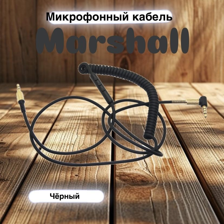

2. images\train\154792.png


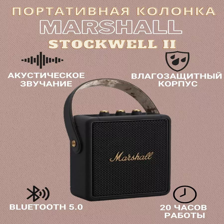

3. images\train\119437.png


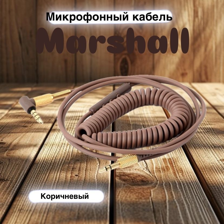

4. images\train\144930.png


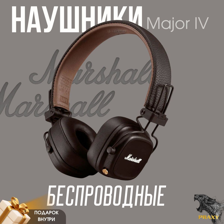

5. images\train\120772.png


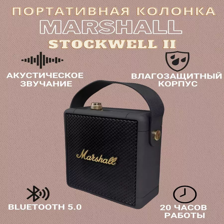


Запрос: батарейки GP
1. images\train\4315.png


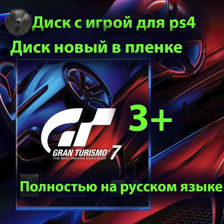

2. images\train\33455.png


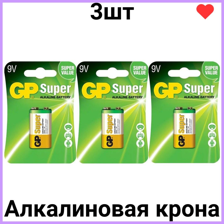

3. images\train\50822.png


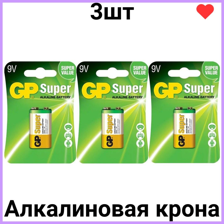

4. images\train\131913.png


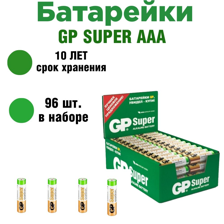

5. images\train\108890.png


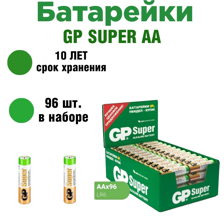

In [ ]:
import clip, torch
from PIL import Image
from IPython.display import display

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model, _ = clip.load("ViT-B/16", device=device)
model.eval()

Xn = torch.nn.functional.normalize(X, dim=1)

queries = ["наушники черные 'Marshall'", "батарейки GP"] 
topk = 5

with torch.inference_mode():
    tz = clip.tokenize(queries).to(device)
    Zt = model.encode_text(tz).float()
    Zt = torch.nn.functional.normalize(Zt, dim=1).cpu()

S = Zt @ Xn.T  # [Q, N]

for qi, q in enumerate(queries):
    print(f"\nЗапрос: {q}")
    idx = torch.topk(S[qi], k=topk).indices.tolist()
    for r, j in enumerate(idx, 1):
        print(f"{r}. {paths[j]}")
        try:
            display(Image.open(paths[j]).resize((224,224)))
        except Exception:
            pass

# Извлечение фич для карточек товара через ResNET50

In [1]:
import os, json, math, numpy as np
import torch
from pathlib import Path
from PIL import Image, ImageOps
from typing import List
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms


In [3]:
class ExifToRGB:
    def __call__(self, im: Image.Image):
        return ImageOps.exif_transpose(im).convert("RGB")
    
IMAGENET_MEAN = (0.485, 0.456, 0.406)
IMAGENET_STD = (0.229, 0.224, 0.225)


def make_eval_transform(size:int):
    return transforms.Compose([
        ExifToRGB(),
        transforms.Resize(size, antialias=True),
        transforms.CenterCrop(size),
        transforms.ToTensor(),
        transforms.Normalize(mean=IMAGENET_MEAN, std=IMAGENET_STD),

    ])

IMG_EXTS = {".jpg",".jpeg",".png",".webp",".bmp",".jfif",".tif",".tiff"}

class ImgFolderEval(Dataset):
    def __init__(self, root: Path, transform):
        root = Path(root)
        self.paths = [p for p in root.rglob("*")
                      if p.is_file() and p.suffix.lower() in IMG_EXTS]
        self.t = transform

    def __len__(self): 
        return len(self.paths)

    def __getitem__(self, i):
        p = self.paths[i]
        with Image.open(p) as im:
            im = ImageOps.exif_transpose(im).convert("RGB")
            x = self.t(im)
        return x, str(p)



In [4]:
import torch.nn as nn
from torchvision.models import resnet50, ResNet50_Weights
from torchvision.models.feature_extraction import create_feature_extractor


class GeM(nn.Module):
    def __init__(self, p: float = 3.0, eps: float = 1e-6):
        super().__init__()
        self.p = nn.Parameter(torch.ones(1)*p)
        self.eps = eps

    def forward(self, x):
        x = x.clamp(min=self.eps).pow(self.p)
        x = x.mean(dim=(-2, -1)).pow(1.0/self.p)
        return x
    

class ResNet50FeatureHead(nn.Module):
    """
    Стабильная версия без feature_extractor:
    прогоняем вход через stem -> layer1 -> layer2 -> layer3 -> layer4,
    берём признаки после layer3 и layer4, применяем GeM,
    конкатенируем (1024+2048=3072) + L2-нормализация.
    """
    def __init__(self, weights=ResNet50_Weights.IMAGENET1K_V2):
        super().__init__()
        m = resnet50(weights=weights)

        # "стем" и стадии как отдельные модули
        self.stem = nn.Sequential(m.conv1, m.bn1, m.relu, m.maxpool)
        self.layer1 = m.layer1
        self.layer2 = m.layer2
        self.layer3 = m.layer3
        self.layer4 = m.layer4

        self.gem3 = GeM(p=3.0)
        self.gem4 = GeM(p=3.0)

        # классификатор/avgpool нам не нужен — не включаем

    @torch.inference_mode()
    def forward(self, x):
        # x: [B,3,H,W]
        x = self.stem(x)          # -> [B,64, H/4,  W/4]
        x = self.layer1(x)        # -> [B,256, ...]
        x = self.layer2(x)        # -> [B,512, ...]
        l3 = self.layer3(x)       # -> [B,1024, ...]
        l4 = self.layer4(l3)      # -> [B,2048, ...]
        f3 = self.gem3(l3)        # [B,1024]
        f4 = self.gem4(l4)        # [B,2048]
        f  = torch.cat([f3, f4], dim=1)   # [B,3072]
        f  = torch.nn.functional.normalize(f, dim=1)
        return f
    


In [ ]:
from tqdm import tqdm

@torch.inference_mode()
def extract_resnet50_ms(img_dir: Path,
                        out_dir: Path,
                        sizes: List[int] = [256, 320, 384],
                        batch_size: int = 64,
                        num_workers: int = 0,
                        device: torch.device = None,
                        fp16: bool = True):
    """
    Multi-scale TTA: для каждого size прогоняем весь датасет (Resize+CenterCrop=size),
    получаем фичи 3072-D, усредняем по scale и снова L2-нормализуем.
    """
    out_dir.mkdir(parents=True, exist_ok=True)
    device = device or torch.device("cuda" if torch.cuda.is_available() else "cpu")

    model = ResNet50FeatureHead().to(device).eval()

    ids_all = None
    feats_sum = None
    for s in sizes:
        tfm = make_eval_transform(s)
        ds  = ImgFolderEval(img_dir, tfm)
        dl  = DataLoader(ds, batch_size=batch_size, shuffle=False,
                         num_workers=num_workers, pin_memory=torch.cuda.is_available(), drop_last=False)
        print(f"\n[Pass size={s}] images: {len(ds)}")
        cur_feats, cur_ids = [], []
        for x, names in tqdm(dl, desc=f"Extract {s}", unit="batch"):
            x = x.to(device, non_blocking=True)
            with torch.autocast(device_type=device.type, dtype=torch.float16, enabled=(fp16 and device.type=="cuda")):
                f = model(x).float()   # [B,3072], уже L2-норм.
            cur_feats.append(f.cpu())
            cur_ids.extend(names)
        cur_feats = torch.cat(cur_feats, dim=0)  # [N,3072]

        if ids_all is None:
            ids_all = cur_ids
            feats_sum = cur_feats
        else:
            assert ids_all == cur_ids, "Разные порядки данных между проходами!"
            feats_sum += cur_feats

 
    feats = feats_sum / len(sizes)
    feats = torch.nn.functional.normalize(feats, dim=1)

    
    np.save(out_dir / "resnet50_ms3072.npy", feats.numpy())
    with open(out_dir / "resnet50_ms_ids.jsonl", "w", encoding="utf-8") as f:
        for p in ids_all:
            f.write(json.dumps({"path": p}, ensure_ascii=False) + "\n")

    print("\nГотово:",
          feats.shape, "->",
          out_dir / "resnet50_ms3072_test.npy")
    return feats, ids_all


In [ ]:
img_dir = Path("images/test")   
out_dir = Path("features_out")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
feats, ids = extract_resnet50_ms(img_dir, out_dir,
                                 sizes=[256,320,384],   
                                 batch_size=64,         
                                 num_workers=0,        
                                 device=device,
                                 fp16=True)

print("shape:", feats.shape, "| примеры:", ids[:3])


[Pass size=256] images: 22735


Extract 256: 100%|██████████| 356/356 [16:34<00:00,  2.79s/batch]



[Pass size=320] images: 22735


Extract 320: 100%|██████████| 356/356 [14:38<00:00,  2.47s/batch]



[Pass size=384] images: 22735


Extract 384: 100%|██████████| 356/356 [15:20<00:00,  2.59s/batch]



Готово: torch.Size([22735, 3072]) -> features_out\resnet50_ms3072_test.npy
shape: torch.Size([22735, 3072]) | примеры: ['images\\test\\10.png', 'images\\test\\100.png', 'images\\test\\10000.png']


In [ ]:
from sklearn.decomposition import PCA

X = feats.clone()  # [N,3072], уже L2-норм

# mean-centering + L2 (убирает общий фон/рамку каталога)
mu = X.mean(dim=0, keepdim=True)
Xc = torch.nn.functional.normalize(X - mu, dim=1)
np.save(out_dir / "resnet50_ms3072_centered.npy", Xc.numpy())

# PCA-whitening (под тонкие отличия
X_np = Xc.numpy()
pca = PCA(n_components=1024, whiten=True, random_state=0)
Xp = pca.fit_transform(X_np)
# финальная L2
Xp = Xp / (np.linalg.norm(Xp, axis=1, keepdims=True) + 1e-12)
np.save(out_dir / "resnet50_ms3072_pca1024.npy", Xp)
print("Saved:", out_dir / "resnet50_ms3072_centered.npy", "и", out_dir / "resnet50_ms3072_pca1024.npy")


Saved: features_out\resnet50_ms3072_centered.npy и features_out\resnet50_ms3072_pca1024.npy


# Создание эмбеддиногов описания

In [15]:
import clip
import torch
from PIL import Image
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import json

In [72]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/16", device=device)

In [73]:
def encode_long_text(text, model, device, max_words_per_chunk=50):
    if pd.isna(text) or len(text.strip()) == 0:  # пустой или NaN
        return np.zeros(512, dtype=np.float32)

    words = text.split()
    embeddings = []
    for i in range(0, len(words), max_words_per_chunk):
        chunk = " ".join(words[i:i+max_words_per_chunk])
        tokens = clip.tokenize([chunk], truncate=True).to(device)
        with torch.no_grad():
            emb = model.encode_text(tokens)
            emb /= emb.norm(dim=-1, keepdim=True)
            embeddings.append(emb.cpu().numpy()[0])

    if len(embeddings) == 0:
        return np.zeros(512, dtype=np.float32)

    return np.mean(np.stack(embeddings), axis=0).astype(np.float32)

# Получаем эмбеддинги текста
text_embeddings = []
for desc in df["description"]:
    if pd.isna(desc):  # если нет текста → 0
        text_embeddings.append(np.zeros(512))
    else:
        text_embeddings.append(encode_long_text(desc, model, device))

In [74]:
len(text_embeddings)

22760

In [75]:
feats = np.load("features_out/clip_image_embs_vit16_test.npy")   
ids = []
with open("features_out/clip_image_ids_vit16_test.jsonl", "r", encoding="utf-8") as f:
    for line in f:
        obj = json.loads(line)
        ids.append(obj["path"])

feats_df = pd.DataFrame(feats, columns=[f"f{i}" for i in range(feats.shape[1])])
feats_df["ItemID"] = [Path(p).stem for p in ids]
feats_df["ItemID"] = feats_df["ItemID"].astype(int)
feats_df

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f503,f504,f505,f506,f507,f508,f509,f510,f511,ItemID
0,0.055320,-0.027547,0.011068,0.068357,0.005349,-0.018063,0.004935,0.001985,0.024957,0.007123,...,-0.018757,0.013234,0.080987,0.019674,0.013767,0.002883,0.033402,-0.020918,0.014506,10
1,-0.014402,0.006573,-0.027674,0.018193,-0.019366,0.004877,0.039499,-0.041475,-0.021001,-0.026651,...,-0.002004,0.009548,0.067697,-0.004601,-0.006338,0.013273,0.038789,0.027086,0.019612,100
2,0.013548,-0.066467,0.025601,0.040745,0.015339,0.012730,0.003226,0.007141,0.003803,0.007028,...,-0.024476,0.003921,0.083407,0.002289,0.034951,0.010638,0.036519,0.001794,0.017028,10000
3,0.005062,-0.005720,0.028452,0.018529,-0.015310,0.024290,0.030252,0.004167,0.020070,0.010690,...,-0.008850,0.013524,0.081911,-0.016868,-0.027657,-0.011007,0.021123,-0.003654,0.011129,100009
4,0.106128,-0.049823,-0.018471,-0.040329,-0.025305,0.000160,-0.019130,0.038921,-0.004897,-0.002643,...,0.003844,-0.007187,0.003071,0.006767,0.045357,0.033259,-0.005048,0.011438,-0.001696,100012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22730,-0.040024,-0.005190,-0.020576,0.022942,-0.040621,0.004765,0.048013,0.021844,0.004343,-0.002803,...,-0.068711,-0.014606,0.084850,-0.014715,0.074331,-0.009833,0.022569,-0.011600,0.008164,99927
22731,0.032195,-0.054800,-0.008665,-0.007537,0.000313,0.001086,0.006459,0.072733,-0.002702,-0.007151,...,0.003427,0.007061,0.053078,0.027220,0.061559,0.000962,-0.034922,-0.023213,0.009700,99937
22732,-0.008355,0.017265,0.037070,0.015723,0.021431,0.001938,-0.011728,0.026081,0.026901,-0.001723,...,-0.001197,-0.034921,0.106145,0.047586,0.097207,0.024162,-0.023199,0.000739,0.089523,99940
22733,-0.043912,0.002501,-0.005465,0.006276,-0.006310,-0.001737,0.031191,-0.001447,-0.017013,-0.023463,...,-0.015350,-0.021241,0.070224,0.032483,0.080799,0.000777,-0.020242,-0.017620,-0.010476,99964


In [76]:
emb_cols = feats_df.columns[:-1]  # первые 512 колонок
id_col = feats_df.columns[-1]     # ItemID

# Создаём словарь ItemID -> эмбеддинг
image_emb_dict = {
    row[id_col]: row[emb_cols].values.astype(np.float32)
    for _, row in feats_df.iterrows()
}



In [ ]:
clip_similarities = []
for i, row in df.iterrows():
    text_emb = np.array(text_embeddings[i], dtype=np.float32)
    text_emb = np.nan_to_num(text_emb, nan=0.0)

    img_emb = image_emb_dict.get(row["ItemID"])
    if img_emb is None:
        img_emb = np.zeros(512, dtype=np.float32)
    else:
        img_emb = np.array(img_emb, dtype=np.float32).flatten()
        img_emb = np.nan_to_num(img_emb, nan=0.0)
        
    # print(text_emb.shape, img_emb.shape)
    sim = cosine_similarity(text_emb.reshape(1, -1), img_emb.reshape(1, -1))[0, 0]
    clip_similarities.append(sim)


(512,) (512,)
(512,) (512,)
(512,) (512,)
(512,) (512,)
(512,) (512,)
(512,) (512,)
(512,) (512,)
(512,) (512,)
(512,) (512,)
(512,) (512,)
(512,) (512,)
(512,) (512,)
(512,) (512,)
(512,) (512,)
(512,) (512,)
(512,) (512,)
(512,) (512,)
(512,) (512,)
(512,) (512,)
(512,) (512,)
(512,) (512,)
(512,) (512,)
(512,) (512,)
(512,) (512,)
(512,) (512,)
(512,) (512,)
(512,) (512,)
(512,) (512,)
(512,) (512,)
(512,) (512,)
(512,) (512,)
(512,) (512,)
(512,) (512,)
(512,) (512,)
(512,) (512,)
(512,) (512,)
(512,) (512,)
(512,) (512,)
(512,) (512,)
(512,) (512,)
(512,) (512,)
(512,) (512,)
(512,) (512,)
(512,) (512,)
(512,) (512,)
(512,) (512,)
(512,) (512,)
(512,) (512,)
(512,) (512,)
(512,) (512,)
(512,) (512,)
(512,) (512,)
(512,) (512,)
(512,) (512,)
(512,) (512,)
(512,) (512,)
(512,) (512,)
(512,) (512,)
(512,) (512,)
(512,) (512,)
(512,) (512,)
(512,) (512,)
(512,) (512,)
(512,) (512,)
(512,) (512,)
(512,) (512,)
(512,) (512,)
(512,) (512,)
(512,) (512,)
(512,) (512,)
(512,) (512,)
(512,)

In [85]:
df["clip_similarity"] = clip_similarities

In [87]:
# выбираем только нужные колонки
df_subset = df[["ItemID", "clip_similarity"]]

# сохраняем в CSV
df_subset.to_csv("clip_similarity_test.csv", index=False)
